# Машиное Обучение
## Bagging
### Хаммуд Обадах

In [0]:
import math
import sys
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.utils import resample
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
np.set_printoptions(suppress=True)
N = 5 #number of bootstrap subsets
class KNN:
    def __init__(self,X,y):
        self.X=X
        self.y=y
        self.max_k=300
        self.dynamic=1
        self.h=0.9
        if len(sys.argv)==5:
            self.h=sys.argv[4]
    def calc_destances(self,combined,point):
        for d in range(len(combined)):
            distance = 0
            for j in range(len(X[0])):
                distance = distance + (combined[d][j] - point[j])**2
            distance = math.sqrt(distance)
            combined[d,-1] = distance
        return combined[combined[:,-1].argsort()]
        
    def calc_prep(self,point):
        X=self.X
        y=self.y
        combined = np.c_[ X, y , np.zeros(len(y))]
        combined = combined[combined[:,-2].argsort()] #sort by class
        combined_distances = self.calc_destances(combined,point)
        return combined_distances
    
    def Epanechnikov(self,u,h=0.9):
        return 3*(1-(u/h)**2)/4
    def Quartic(self,u,h=0.9):
        return 15*(1-(u/h)**2)**2/16

    def calc_knn(self,k,combined_distances,kernel=True):
        number_of_points=np.zeros(classes)
        step=1
        _d=combined_distances[k][-1] #distance for k+1
        for i in range(k):
            if kernel:
                if self.dynamic=='True':
                    step=self.Epanechnikov(combined_distances[i][-1],_d)
                else:
                    step=self.Epanechnikov(combined_distances[i][-1],self.h)
            number_of_points[int(combined_distances[i][-2])]+=step #Epanechnicov(d) or Epanechnicov(d)*d
        point_class=number_of_points.argmax(axis=0)
        return point_class
    def predict(self,x):
        yhat=np.zeros(len(x))
        for i in range(len(yhat)):
            yhat[i] = self.calc_knn(5,self.calc_prep(x[i]),False)
        return yhat

In [0]:
data = np.genfromtxt("waveform.csv", delimiter=',')
new_data=np.zeros(len(data[0]))
classes = int(np.amax(data[:,-1]) + 1)
_=np.zeros(classes)
for i in range(len(data)):
    if _[int(data[i][-1])]<1000:
        new_data=np.c_[new_data,data[i]]
    _[int(data[i][-1])]+=1
new_data=new_data.transpose()
data=np.delete(new_data,0,axis=0)
X = data[:,0:-1]
y = data[:,-1:].transpose()[0].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
classes = np.amax(y) + 1

In [0]:
def calc_vars(yy,fname=None):
    TP=0
    TN=0
    FP=0
    FN=0
    for i in range(len(yy)):
        if(yy[i]==y_test[i] and yy[i]==1):
            TP+=1
        elif yy[i]==y_test[i] and yy[i]!=1:
            TN+=1
        elif yy[i]!=y_test[i] and yy[i]==1:
            FN+=1
        elif yy[i]!=y_test[i] and yy[i]!=1:
            FP+=1
    ac = (TP+TN)/(TP+TN+FP+FN) * 100
    if (TP+FP==0):
        Perc=0
    else:
        Perc=TP/(TP+FP)
    if (TP+FN==0):
        Recall=0
    else:
        Recall=TP/(TP+FN)
    if (TP+FN==0):
        TPR=0
    else:
        TPR=TP/(TP+FN)
    if (FP+TN==0):
        FPR=0
    else:
        FPR=FP/(FP+TN)
    #ROC
    AUC=0.5*(TPR*FPR)+TPR*(1-FPR)+0.5*(1-FPR)*(1-TPR)
    print("Ac=",ac,"Perc=",Perc,"Recall=",Recall,"AUC=",AUC)
    ROC = [FPR,TPR]
    PR=[Recall,Perc]
    PR_AUC=(Perc*Recall)+0.5*Perc*(1-Recall)+0.5*Recall*(1-Perc)
    if fname!=None:
        plt.plot([i for i in [0,ROC[0],1]] ,[point for point in [0,ROC[1],1]],[i for i in [0,ROC[0],1]] ,[point for point in [0,ROC[1],1]],'ro')
        plt.title("roc-auc")
        plt.savefig(str(fname)+"_ROC.png")
        plt.show()
        plt.plot([i for i in [0,Recall,1]] ,[point for point in [1,Perc,0]],[i for i in [0,Recall,1]] ,[point for point in [1,Perc,0]],'ro')
        plt.title("pr-auc")
        plt.savefig(str(fname)+"_PR.png")
        plt.show()
    return "Ac="+str(ac)+", Perc="+str(Perc)+", Recall="+str(Recall)+", AUC="+str(AUC) , ac


In [0]:
N=5
subsets_X = []
subsets_y =[]
for i in range(N):
        boot = resample(X,y, replace=True, n_samples=int(len(X_train)))
        subsets_X.append(boot[0])
        subsets_y.append(boot[1])

In [0]:
def most_common(lst):
    return max(set(lst), key=lst.count)

#Bootstrap KNN
def bootstrapKNN(testing):
    knns = []
    predictions=np.zeros((N,len(testing)))
    for i in range(N):
        knns.append(KNeighborsClassifier(n_neighbors=3))
        knns[i].fit(subsets_X[i],subsets_y[i])
        predictions[i]=knns[i].predict(testing)
        final_predictions=np.zeros(len(testing))
    for i in range(len(predictions[0])):
        final_predictions[i]=most_common(predictions[:,i].tolist())
    return final_predictions


In [0]:
singleKNN = KNeighborsClassifier(n_neighbors=3)
singleKNN.fit(X_train,y_train)
singleKNN_pred = singleKNN.predict(X_test)
bootKNN_pred = bootstrapKNN(X_test)

Ac= 81.16666666666667 Perc= 0.6527196652719666 Recall= 0.8387096774193549 AUC= 0.8191132928159577


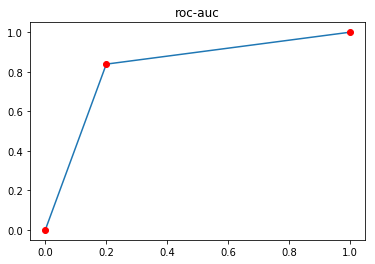

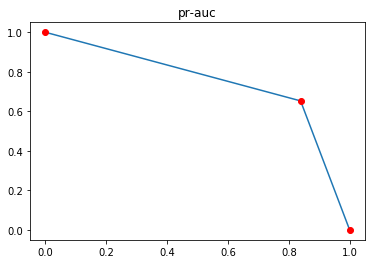

Ac= 89.33333333333333 Perc= 0.7866666666666666 Recall= 0.917098445595855 AUC= 0.8995811638298685


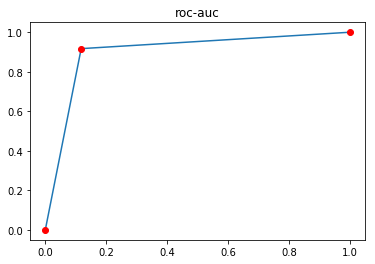

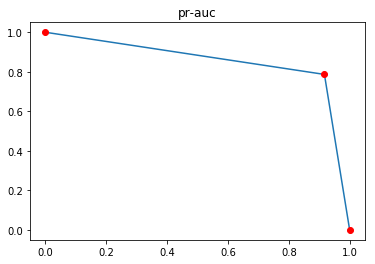

In [0]:
a1=calc_vars(singleKNN_pred,"KNN")[0]
a1bag=calc_vars(bootKNN_pred,"KNN_bagging")[0]
print("")

In [0]:
singleKNN = KNeighborsClassifier(n_neighbors=5)
singleKNN.fit(X_train,y_train)
sizes_simple=np.zeros(8)
sizes_bag=np.zeros(8)
for i in range(0,8):
    singleKNN_pred = singleKNN.predict(X_test[:(i+1)*50])
    bootKNN_pred = bootstrapKNN(X_test[:(i+1)*50])
    sizes_simple[i] = calc_vars(singleKNN_pred)[1]
    sizes_bag[i]=calc_vars(bootKNN_pred)[1]

Ac= 78.0 Perc= 0.7272727272727273 Recall= 0.7619047619047619 AUC= 0.7775041050903121
Ac= 90.0 Perc= 0.85 Recall= 0.8947368421052632 AUC= 0.898981324278438
Ac= 83.0 Perc= 0.725 Recall= 0.8285714285714286 AUC= 0.8296703296703296
Ac= 89.0 Perc= 0.7837837837837838 Recall= 0.90625 AUC= 0.8943014705882353
Ac= 82.66666666666667 Perc= 0.7241379310344828 Recall= 0.8076923076923077 AUC= 0.8222135007849294
Ac= 90.66666666666666 Perc= 0.7962962962962963 Recall= 0.9347826086956522 AUC= 0.9145066889632107
Ac= 82.5 Perc= 0.7088607594936709 Recall= 0.8235294117647058 AUC= 0.8246434937611408
Ac= 88.5 Perc= 0.76 Recall= 0.9193548387096774 AUC= 0.8944600280504909
Ac= 84.0 Perc= 0.7216494845360825 Recall= 0.8433734939759037 AUC= 0.8408484236346584
Ac= 88.4 Perc= 0.7634408602150538 Recall= 0.9102564102564102 AUC= 0.8911747167561122
Ac= 82.66666666666667 Perc= 0.7017543859649122 Recall= 0.8163265306122449 AUC= 0.8240048494645382
Ac= 88.66666666666667 Perc= 0.7777777777777778 Recall= 0.8936170212765957 AUC= 

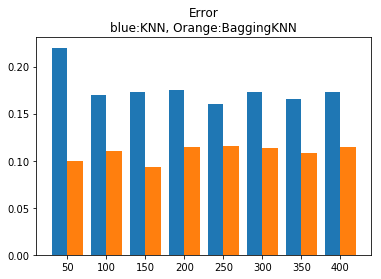

In [0]:
l = np.arange(1,9)*50
def subcategorybar(t, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(t))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")   
    plt.xticks(_X, t)


subcategorybar(l, [1-sizes_simple/100,1-sizes_bag/100])
plt.title("Error\nblue:KNN, Orange:BaggingKNN")
plt.savefig("error.png")
plt.show()

In [0]:
from sklearn.tree import DecisionTreeClassifier
#Bootstrap CART
def bootstrapCART(testing):
    carts = []
    carts_predictions=np.zeros((N,len(testing)))
    for i in range(N):
        carts.append(DecisionTreeClassifier())
        carts[i].fit(subsets_X[i],subsets_y[i])
        carts_predictions[i]=carts[i].predict(testing)

    carts_final_predictions=np.zeros(len(testing))
    for i in range(len(carts_predictions[0])):
        carts_final_predictions[i]=most_common(carts_predictions[:,i].tolist())
    return carts_final_predictions

Ac= 77.83333333333333 Perc= 0.6721311475409836 Recall= 0.7557603686635944 AUC= 0.7734415420341472


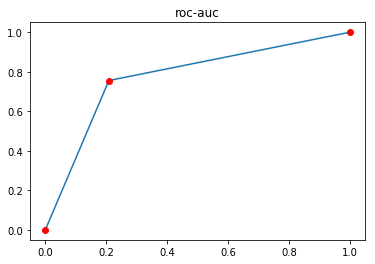

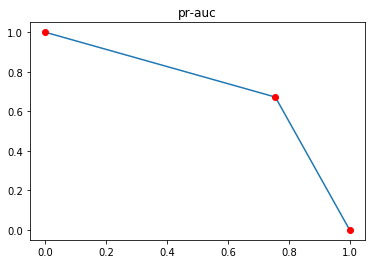

Ac= 96.66666666666667 Perc= 0.927536231884058 Recall= 0.9746192893401016 AUC= 0.9686992228338226


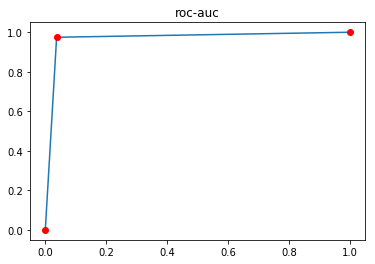

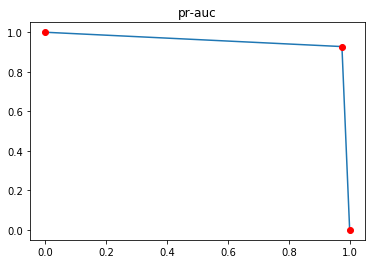

In [0]:
singleCART = DecisionTreeClassifier()
singleCART.fit(X_train,y_train)
singleCART_pred = singleCART.predict(X_test)
bootCART_pred = bootstrapCART(X_test)
b1=calc_vars(singleCART_pred,"CART")[0]
b1bag=calc_vars(bootCART_pred,"CART_bagging")[0]
print("")

In [0]:
html_str = """
<center><h3>Bagging</h3></center>
<b>CART</b><br />
Before bagging: 
"""+ b1+"""<br />
<img src="CART_ROC.png"><br />
<img src="CART_PR.png"><br />
After bagging: 
"""+ b1bag+"""<br />
<img src="CART_bagging_ROC.png"><br />
<img src="CART_bagging_PR.png"><br />
<br/>
<b>KNN</b><br />
Before bagging: 
"""+ a1+"""<br />
<img src="KNN_ROC.png"><br />
<img src="KNN_PR.png"><br />
After bagging: 
"""+ a1bag+"""<br />
<img src="KNN_bagging_ROC.png"><br />
<img src="KNN_bagging_PR.png"><br />
<br/>
Different testing size:<br/>
<img src="error.png"><br />
KNN:"""+str(1-sizes_simple/100)+"""<br/>
Bagging KNN: """+str(1-sizes_bag/100)+"""
<br/>
"""

Html_file= open("output.html","w")
Html_file.write(html_str)
Html_file.close()